# FRACTL Tutorial

---

This interactive tutorial takes you through the steps of how to run FRACTL. FRACTL is a fast traditional solver with integrated interpolation using LROSE infrastructure, and it is able to perform both gridding and multi-Doppler synthesis for airborne radars and multiple ground-based radars. This is different than Radx2Grid which is only capable of gridding data for a single ground-based radar. FRACTL adopts both REORDER and CEDRIC programs. REORDER transforms radar data from its native coordinate system to cartesian space and the data can then be ingested into CEDRIC for synthesis. FRACTL currently accepts either CfRadial or DORADE file format. Different than Radx2Grid, FRACTL doesn’t require the CfRadial file with an aggregation of the sweeps.

---


## Tutorial Overview

### 1. Setup 

#### Directory organization 

<div>
<img src="../images/wind_structure.png" width="500"/>
</div>

#### Download desired input data and a parameter file:

**a. QC-ed radar data files will be downloaded in this example:**
* cfrad.20080702_230459.000_to_20080702_230948.000_CSU-PAWN_PPI.nc
* cfrad.20080702_230527.000_to_20080702_230946.000_CSU-CHIL_PPI.nc

*The QC process is not included in this tutorial. Further QC details can be found on **??** *

**b. Parameter file:**
* fractl_params

*Note: The parameter file have already been modified to run straight out of the box.*

#### Environment and packages¶

First, we import the required python packages to run this notebook. Most of the LROSE processing can be done with the os package and shell commands. 

In [4]:
import os
#### Need to modify later
os.environ['BASE_DIR'] = '/home/jovyan/ams2023'
os.environ['LROSE_DIR'] = '/usr/local/lrose/bin'
base_dir = os.environ['BASE_DIR']
!echo "Base directory: "$BASE_DIR

Base directory: /bell-scratch/tcha/LROSE/AMS2023


We will download the data and organize the directory by performing the following commands:

In [5]:
# make a directory for all the data files in the echo tutorial (raw and analysis)
!rm -rf ${BASE_DIR}/data/wind
!mkdir ${BASE_DIR}/data/wind


## make subdirectory within data for input and output directory
!rm -rf ${BASE_DIR}/data/wind/input
!mkdir ${BASE_DIR}/data/wind/input

!rm -rf ${BASE_DIR}/data/wind/output_frac
!mkdir ${BASE_DIR}/data/wind/output_frac

# ## wget raw files from EOL server ###need to modify
# !wget http://front.eol.ucar.edu/data/notebooks/ams2023/gfsanl_4_2018091418.g2.tar
# !wget http://front.eol.ucar.edu/data/notebooks/ams2023/KMHX20180914_191822_V06.ar2v

# ## move files to proper directory
!mv cfrad1 ${BASE_DIR}/data/wind/input
!mv cfrad2 ${BASE_DIR}/data/wind/input

### 2. Prepare data for analysis

In this tutorial, the provided data have been QC-ed. For a standard procedure, users are recommended to perform the following procedure:

* Convert radar data from level 2 to CfRadial. 

* Quality-controlled raw data by desired QC-tools. For example: HawkEdit, PyArt..etc.

* Modify the parameter file
    - Parameter files modifications
---
* **GRID SPEC**
    * zGrid [line 190], yGrid [line 200], xGrid [line 210]
* **PROJECTION**
    * projLat0 [line 255], projLon0 [line 265]: The origin is an arbitrarily chosen point, but should be relevant for your objective. For example, it can be the geographical center of your multi-radar domain, the physical location of a radar for a single-radar domain, or the location of a feature of interest within your dataset. The latitude and longitude of your chosen origin should be given in decimal degrees.
* **FILES AND DIRECTORIES**
    * inDir [line 453]: data directory
    * fileRegex [line 463]: data type. ^swp or ^cfrad
    * outNc [line 496]: output directory
* **FIELDS**
    * radialName [line 512]: variable name for the Doppler velocity
    * dbzName [line 522]: variable name for the reflectivity
    * ncpName [line 532]: variable name for the normalized coherent power

### 3. Run FRACTL

After modifying the parameter file, directing to the parameter file by typing the *-params* flags

In [3]:
!${LROSE_DIR}/fractl -params ${BASE_DIR}/params/wind/fractl_params 

/bell-scratch/community/bin//fractl: /usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.26' not found (required by /bell-scratch/mmbell/community/lib/libRadx.so)
/bell-scratch/community/bin//fractl: /usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.26' not found (required by /bell-scratch/mmbell/community/lib/libNcxx.so)
/bell-scratch/community/bin//fractl: /usr/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.26' not found (required by /bell-scratch/mmbell/community/lib/libtoolsa.so)


### 4. Plot SAMURAI results

#### Environment and packages¶
Import the packages to plot the SAMURAI output

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import xarray as xr
import matplotlib as mpl
import cartopy.crs as ccrs
from metpy.plots import ctables
mpl.rcParams['figure.dpi'] = 300

Load the netcdf file

In [7]:
inDir = base_dir+"/data/wind/output_frac/20080702/"
file = "ncf_20080702_230948.nc"
ds_radar = xr.open_dataset(inDir+file).squeeze()
ds_radar.load()

<xarray.Dataset>
Dimensions:          (z0: 30, y0: 71, x0: 71)
Coordinates:
    time             datetime64[ns] 2008-07-02T23:09:48
  * z0               (z0) float64 0.0 500.0 1e+03 ... 1.35e+04 1.4e+04 1.45e+04
  * y0               (y0) float64 1.5e+04 1.55e+04 1.6e+04 ... 4.95e+04 5e+04
  * x0               (x0) float64 1.5e+04 1.55e+04 1.6e+04 ... 4.95e+04 5e+04
Data variables: (12/14)
    grid_mapping_0   int32 0
    lat0             (y0, x0) float64 40.58 40.58 40.58 40.58 ... 40.9 40.9 40.9
    lon0             (y0, x0) float64 -104.5 -104.5 -104.4 ... -104.0 -104.0
    start_time       float64 1.215e+09
    stop_time        float64 1.215e+09
    W                (z0, y0, x0) float32 nan nan nan nan ... nan nan nan nan
    ...               ...
    DBZ              (z0, y0, x0) float32 nan nan nan nan ... nan nan nan nan
    NCP              (z0, y0, x0) float32 nan nan nan nan ... nan nan nan nan
    conditionNumber  (z0, y0, x0) float32 nan nan nan nan ... nan nan nan nan
    W_std            (z0, y0, x0) float32 nan nan nan nan ... nan nan nan nan
    V_std            (z0, y0, x0) float32 nan nan nan nan ... nan nan nan nan
    U_std            (z0, y0, x0) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.5

In [8]:
## Get variables:
da_DBZ = ds_radar['DBZ']
da_U = ds_radar['U']
da_V = ds_radar['V']
da_W = ds_radar['W']
da_CN = ds_radar['conditionNumber']

lon, lat = np.meshgrid( ds_radar.lon0, ds_radar.lat0 )

In [11]:
ds_radar['z0']

<xarray.DataArray 'z0' (z0: 30)>
array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,  4000.,
        4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,  8000.,  8500.,
        9000.,  9500., 10000., 10500., 11000., 11500., 12000., 12500., 13000.,
       13500., 14000., 14500.])
Coordinates:
    time     datetime64[ns] 2008-07-02T23:09:48
  * z0       (z0) float64 0.0 500.0 1e+03 1.5e+03 ... 1.35e+04 1.4e+04 1.45e+04
Attributes:
    standard_name:  height
    units:          m
    positive:       up

In [22]:
np.shape(plotting_lon)

(71, 71)

Text(0.5, -0.1, '[dBZ]')

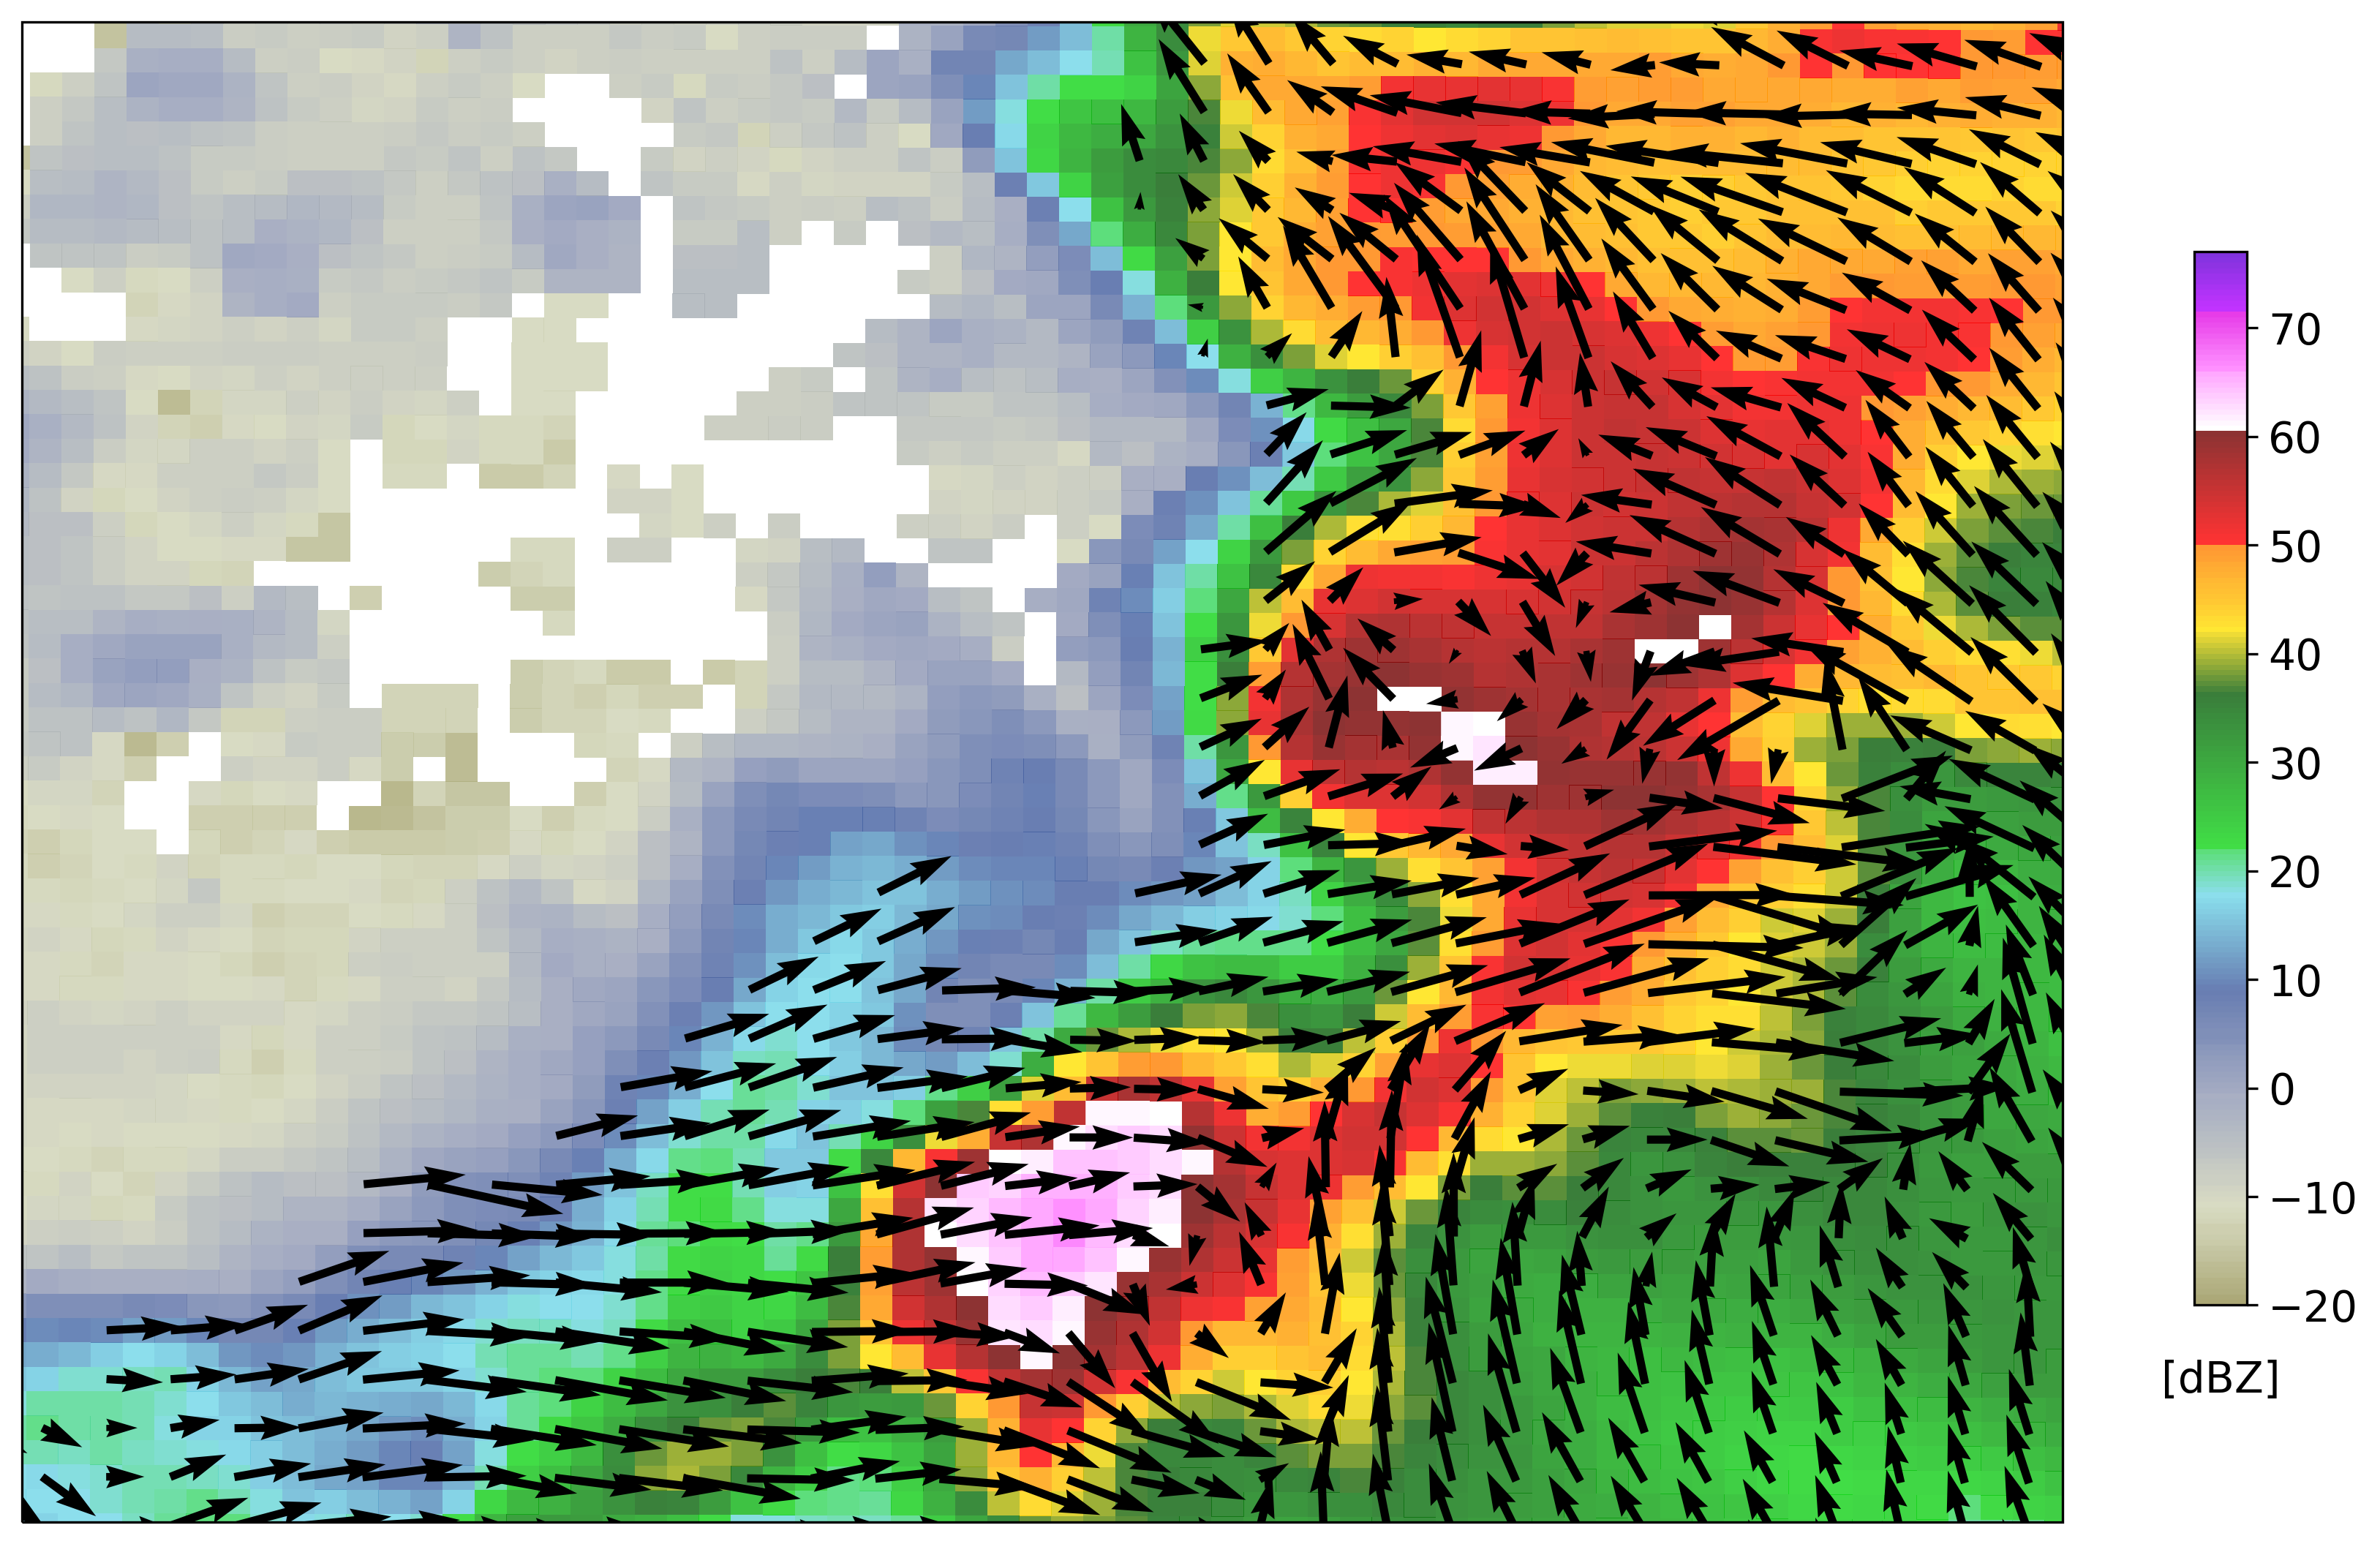

In [23]:
## Set NWS reflectivity colorbar:
ref_norm, ref_cmap = ctables.registry.get_with_steps('NWSStormClearReflectivity', -20, 0.5)
plotting_alt=3*1000 # altitude at 3 km
plotting_var = ds_radar.DBZ.sel(z0=plotting_alt).data
plotting_var_u = ds_radar.U.sel(z0=plotting_alt).data
plotting_var_v = ds_radar.V.sel(z0=plotting_alt).data
plotting_lon = ds_radar.lon0
plotting_lat = ds_radar.lat0

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
# stamen_terrain = cimgt.Stamen('terrain')
# ax.add_image(stamen_terrain, 8)
    
ext = 0.02    
ax.set_extent([np.min(lon)+ext, np.max(lon)-ext, np.min(lat)+ext, np.max(lat)-ext], crs=ccrs.PlateCarree())
    
cf1 = ax.pcolormesh( plotting_lon, plotting_lat, plotting_var
                    , cmap=ref_cmap, norm=ref_norm
                    , alpha=0.8
                    , shading='auto'
                    , transform=ccrs.PlateCarree() 
                    )
step = 2
cf_q = ax.quiver( plotting_lon[::step, ::step], plotting_lat[::step, ::step]
                    , plotting_var_u[::step, ::step], plotting_var_v[::step, ::step]
                    , scale=200
                    , width=0.004
                    , color='k'
                    , transform=ccrs.PlateCarree() 
                    )
cbar_ax = fig.add_axes([0.95, 0.3, 0.02, 0.4])
cbar = fig.colorbar(cf1, cax=cbar_ax, fraction=0.04)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_title('[dBZ]', fontsize=14, y=-0.1)